In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import seaborn

In [3]:
import pandas as pd
import numpy as np

# Графика

In [5]:
x = np.arange(10) + 3
y = x ** 2

plot - когда абсцисса упорядочена, ордината - число (функциональная зависимость)

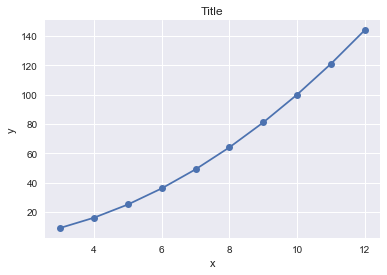

In [13]:
plt.plot(x, y, "o-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Title")

scatter - когда абсцисса и ордината вещественные, неупорядоченные

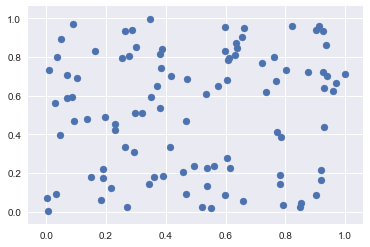

In [15]:
x = np.random.rand(100)
y = np.random.rand(100)
plt.scatter(x, y)

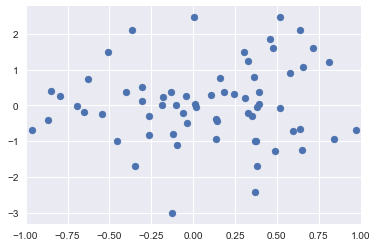

In [21]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
plt.xlim(-1, 1)
#plt.yscale("log") # если данные распределены неравномерно
plt.scatter(x, y)

bar - когда абсцисса неупорядоченная, ордината - число

([<matplotlib.axis.XTick at 0x11518d908>,
 <a list of 10 Text xticklabel objects>)

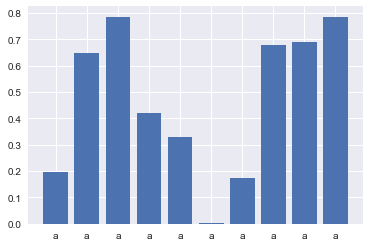

In [23]:
plt.bar(np.arange(10), np.random.rand(10))
plt.xticks(np.arange(10), ["a"]*10)

plt.plot, plt.scatter, plt.bar

еще можно визуализировать матрицы:

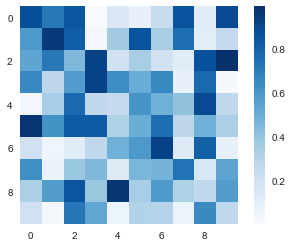

In [32]:
matrix = np.random.rand(10, 10)
plt.imshow(matrix, cmap="Blues")
plt.grid("off")
plt.colorbar()

### Задание с визуализацией датафрейма

In [36]:
A = pd.DataFrame({"C1":[10,2,6,3,4,8,10], "C2": [3,5,6,1,2,7,10]}, 
                index=['a b c d e f g'.split(' ')])

In [37]:
A

,C1,C2
a,10,3
b,2,5
c,6,6
d,3,1
e,4,2
f,8,7
g,10,10


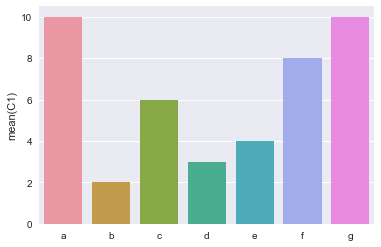

In [42]:
seaborn.barplot(A.index, A['C1'])

In [43]:
A["ix"] = A.index

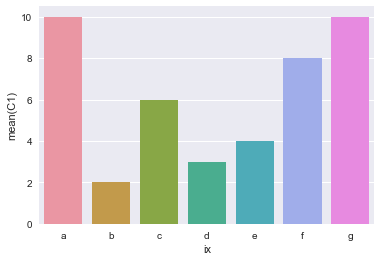

In [44]:
seaborn.barplot(data=A, x="ix", y="C1")

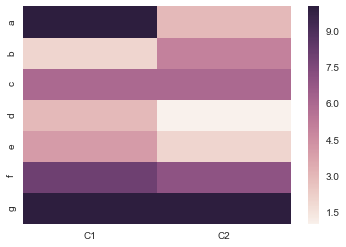

In [46]:
seaborn.heatmap(A[["C1","C2"]])

In [50]:
A.columns[[0,1]]

Index(['C1', 'C2'], dtype='object')

In [52]:
A.columns[:2]

Index(['C1', 'C2'], dtype='object')

In [53]:
A.dtypes

C1     int64
C2     int64
ix    object
dtype: object

### Проверка задачи с семинара по функциям потерь

In [56]:
y = np.random.randint(50, size=15)

In [58]:
C = np.linspace(start=np.min(y)-1, stop=np.max(y)+1, num=1000)

In [64]:
err = np.abs(y-C[0]).mean()

In [77]:
err = np.abs(y[:,np.newaxis]-C).mean(axis=0)

In [81]:
err.shape

(1000,)

(10, 11.5)

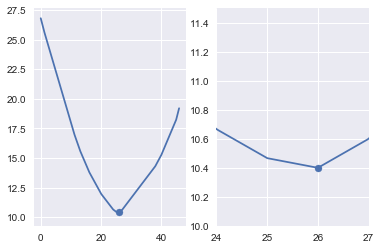

In [91]:
plt.subplot(1, 2, 1)
m = np.median(y)
plt.plot (C, err)
plt.scatter ([m], [np.abs(y-m).mean()])
plt.subplot(1, 2, 2)
m = np.median(y)
plt.plot (C, err)
plt.scatter ([m], [np.abs(y-m).mean()])
plt.xlim([24,27])
plt.ylim([10,11.5])

# Sklearn

In [111]:
class Counter:
    def __init__(self, start=0):
        self.i = start
        
    def add(self, value, ret=False):
        self.i += value
        if ret:
            return self.i
        
    def show(self):
        print(self.i)
        
    def __smth__(self):
        print("I do nothing")
        self.__x = "Я переменная"

In [112]:
counter = Counter(12)
counter.show()
print(counter.add(3))
print(counter.add(3, ret=True))
counter.show()

12
None
18
18


In [114]:
counter.i

18

In [113]:
counter.__smth__()
counter.__x

I do nothing


AttributeError: 'Counter' object has no attribute '__x'

In [96]:
def add(current, value):
    return current + value

In [97]:
res = add(12, 3)
add(res, 3)

18

In [117]:
counter2 = Counter()
counter2.show()
print(counter2.add(3))
print(counter2.add(3, ret=True))
counter2.show()

0
None
6
6


In [136]:
### наследование классов
class AdvancedCounter(Counter):
    def __init__(self, start=0, mult_start=1):
        super(AdvancedCounter, self).__init__(start)
        self.mult_i = mult_start
        
    def mult(self, value):
        self.mult_i *= value
        
    def show(self):
        print(self.i, self.mult_i)

In [137]:
ac = AdvancedCounter(start=12, mult_start=3)
ac.add(5)
ac.mult(3)
ac.show()

17 9


Класс линейной регрессии

In [153]:
class LinearRegression:
    def __init__(self, l2 = 0):  # инициализация: запомнить коэффициент l2-регуляризации
        self.l2 = l2
        
    def fit(self, X, y): # метод fit: принимает X и y и обучает модель
        self.coefs = np.linalg.inv(X.T @ X + self.l2 * np.eye(X.shape[1])) @ X.T @ y
    
    def predict(self, X_test): # метод predict 
        return X_test @ self.coefs 

In [160]:
X_train = np.random.rand(100,10)
coefs_true = np.random.rand(10)
Y = X_train @ coefs_true
coefs_true
#Y

array([ 0.22970372,  0.03165868,  0.0404824 ,  0.02776249,  0.22447042,
        0.35811809,  0.09894127,  0.9803226 ,  0.11365278,  0.28276384])

In [161]:
regr = LinearRegression()
regr.fit(X_train, Y)
regr.coefs
#regr.predict(X_train)

array([ 0.22970372,  0.03165868,  0.0404824 ,  0.02776249,  0.22447042,
        0.35811809,  0.09894127,  0.9803226 ,  0.11365278,  0.28276384])

### sklearn
- датасеты - самые популярные, искусственые
- предобработка
- работа с признаками: создание новых, отбор признаков
- разбивка выборки на обучение-контроль, кросс-валидация
- метрики
- методы: с учителем, без учителя

#Обучение с учителем:

class Name:

    def __init__(<hyperparameters>)
    
    def fit(X, y):
    
    def predict(X):
    
    

Обучение без учителя, предобработка, работа в признаками:

class Name:

    def __init__(<hyperparams>):

    def fit(X):

    def transform(X):

    def fit_transform(X):



In [172]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.feature_extraction.text
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, \
mean_absolute_error, mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
cross_val_score()

In [ ]:
ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

In [173]:
from sklearn.datasets import load_boston

In [174]:
boston = load_boston()

In [177]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [179]:
X = boston["data"]
y = boston["target"]

In [190]:
#mean_squared_error()
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle

In [188]:
estimator = Lasso(normalize=True)
gs = GridSearchCV(estimator, 
                 param_grid={"alpha": 10.0**np.arange(-3, 4)},
                 scoring=make_scorer(mean_squared_error),
                 verbose=10)

In [191]:
X, y = shuffle(X, y)

In [192]:
gs.fit(X, y)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] alpha=0.001 .....................................................
[CV] ..................... alpha=0.001, score=27.853398, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ..................... alpha=0.001, score=25.117321, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ..................... alpha=0.001, score=17.576989, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...................... alpha=0.01, score=29.925098, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...................... alpha=0.01, score=26.686261, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...................... alpha=0.01, score=17.715879, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error), verbose=10)

In [195]:
gs.cv_results_

{'mean_fit_time': array([ 0.00136296,  0.00123628,  0.00098101,  0.00095765,  0.00102592,
         0.00096607,  0.00104101]),
 'mean_score_time': array([ 0.00023429,  0.00027959,  0.00020798,  0.0002226 ,  0.00037146,
         0.00023516,  0.00028435]),
 'mean_test_score': array([ 23.52763995,  24.78969848,  32.81543466,  84.58464898,
         84.58464898,  84.58464898,  84.58464898]),
 'mean_train_score': array([ 21.59331137,  22.92189216,  32.48091206,  84.38252015,
         84.38252015,  84.38252015,  84.38252015]),
 'param_alpha': masked_array(data = [0.001 0.01 0.10000000000000001 1.0 10.0 100.0 1000.0],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.10000000000000001},
  {'alpha': 1.0},
  {'alpha': 10.0},
  {'alpha': 100.0},
  {'alpha': 1000.0}),
 'rank_test_score': array([7, 6, 5, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([ 27.85339842,  29.92509765,  40.349292

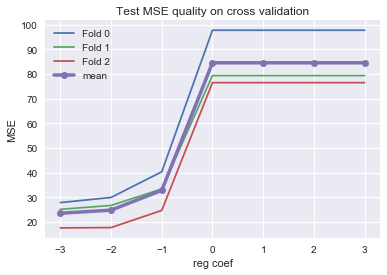

In [210]:
for i in range(3):
    plt.plot(np.arange(-3, 4), gs.cv_results_["split%d_test_score"%i], label="Fold %d"%i)
plt.plot(np.arange(-3, 4), gs.cv_results_["mean_test_score"], "o-", linewidth=3.5, label="mean")
plt.xlabel("reg coef")
plt.ylabel("MSE")
plt.title("Test MSE quality on cross validation")
plt.legend()